# Рубежный контроль №1 по курсу «Методы машинного обучения»

Подготовил: Студент группы ИУ5-25М Клюкин Н. А. 27.03.2024

## Вариант задания
| Номер варианта  | Задание 1 | Задание 2 | Доп. требование |
|-----------------|-----------|-----------|-----------|
|          5      |      5    |      25   |      для произвольной колонки данных построить парные диаграммы (pairplot)   |

## Описание выбранного датасета
Этот набор данных предоставляет полную информацию о поведении клиентов для типичной страницы туризма в социальных сетях. Датасет содержит в себе следующие поля:
- UserID (PK) - удаляем
- Taken_product - купил тур (да/нет)
- Yearly_avg_view_on_travel_page - Среднегодовое количество просмотров пользователем любой страницы, связанной с путешествиями
- preferred_device - Предпочтительное устройство для входа пользователя в систему
- total_likes_on_outstation_checkin_given - Общее количество лайков, поставленных пользователем при регистрации вне станции за последний год
- yearly_avg_Outstation_checkins - Среднее количество регистраций за пределами станции, выполненных пользователем
- member_in_family - Общее количество членов семьи, упомянутых пользователем в учетной записи
- preferred_location_type - Предпочтительный тип местоположения для перемещения пользователя
- Yearly_avg_comment_on_travel_page - Среднегодовые комментарии пользователя на любой странице, связанной с путешествиями
- total_likes_on_outofstation_checkin_received - Общее количество лайков, полученных пользователем при выезде за пределы станции за последний год
- week_since_last_outstation_checkin - Количество недель с момента последнего обновления пользователем регистрации вне станции
- following_company_page - Читает ли клиент страницу компании (Да или Нет)
- montly_avg_comment_on_company_page - Среднее количество комментариев пользователя на странице компании в месяц
- working_flag - работает или нет
- travelling_network_rating - Рейтинг, указывающий, есть ли у пользователя близкие друзья, которые также любят путешествовать. 1 — высокий, 4 — самый низкий
- Adult_flag - взрослый или нет
- Daily_Avg_mins_spend_on_traveling_page - Среднее время, проведенное пользователем на странице путешествия компании

## Импорт библиотек

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
# Подгрузим датасет и продемонстрируем его содержимое
data_loaded = pd.read_csv('./data/cust_beh.csv', sep=",")
data_loaded.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [89]:
# Используем только некоторые признаки
cols_filter = ['Taken_product', 'preferred_device', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page',
        'travelling_network_rating']
data = data_loaded[cols_filter]
data.head()

,Taken_product,preferred_device,Yearly_avg_view_on_travel_page,Yearly_avg_comment_on_travel_page,travelling_network_rating
0,Yes,iOS and Android,307.0,94.0,1
1,No,iOS,367.0,61.0,4
2,Yes,iOS and Android,277.0,92.0,2
3,No,iOS,247.0,56.0,3
4,No,iOS and Android,202.0,40.0,4


# Задание 1. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "one-hot encoding".

## Информация из лекции
- One-hot encoding предполагает, что значение категории заменяется на отдельную колонку, которая содержит бинарные значения.
- Преимущества:
    - Простота реализации.
    - Подходит для любых моделей, так как НЕ создает фиктивное отношение порядка между значениями.
- Недостатки:
    - Расширяется признаковое пространство.

## Решение

In [90]:
pd.get_dummies(data[['preferred_device']]).head()

,preferred_device_ANDROID,preferred_device_Android,preferred_device_Android OS,preferred_device_Laptop,preferred_device_Mobile,preferred_device_Other,preferred_device_Others,preferred_device_Tab,preferred_device_iOS,preferred_device_iOS and Android
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True


In [91]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['preferred_device']], dummy_na=True).head()

,preferred_device_ANDROID,preferred_device_Android,preferred_device_Android OS,preferred_device_Laptop,preferred_device_Mobile,preferred_device_Other,preferred_device_Others,preferred_device_Tab,preferred_device_iOS,preferred_device_iOS and Android,preferred_device_nan
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,False


# Задание 2. Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе межквартильного размаха.

## Информация из лекции
Межквартильный размах IQR (interquartile range, IQR) - это разность третьего квартиля и первого квартиля:

## Решение

### Обнаруживаем выбросы

In [92]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

### Удаление выбросов

In [93]:
data.shape

(11770, 5)

In [94]:
filtered_dataset = remove_outliers_iqr(data, 'Yearly_avg_view_on_travel_page')
filtered_dataset.shape

(11168, 5)

# Построение графика по варианту

In [95]:
import seaborn as sns

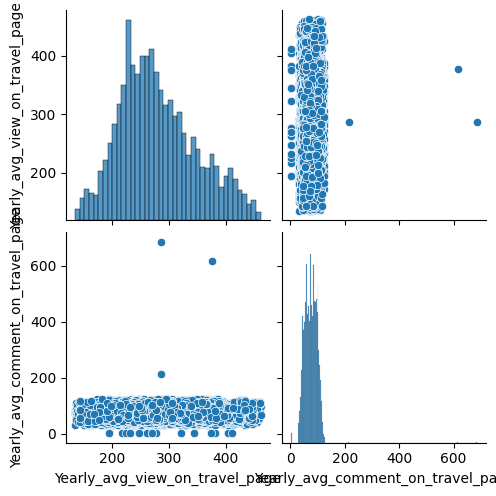

In [96]:
sns.pairplot(filtered_dataset, vars=['Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page'])